In [ ]:
# loading the data 

In [696]:
from sklearn.datasets import fetch_openml
import numpy as np 
import matplotlib.pyplot as plt 



In [697]:
mnist=fetch_openml('mnist_784')

In [903]:
x,y=mnist['data'],mnist['target']
x=x[:3000]
y=y[:3000]


In [904]:
#preprocessing for converting y into one hot encoded 

import tensorflow as tf
from tensorflow.keras.utils import to_categorical


y=y.astype(int)

from sklearn.model_selection import train_test_split
x,y=x.to_numpy(),y.to_numpy()


y=to_categorical(y)



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [905]:
#makes it easier for deep learning 

X_train,X_test=X_train.T,X_test.T
y_train=y_train.T
y_test=y_test.T



In [906]:
def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return (1 -  np.power(np.tanh(x), 2))


def softmax(x):
        exp_x=np.exp(x)

        sum_expx=np.sum(exp_x,axis=0)
        softmax_x=exp_x/sum_expx
        return softmax_x
def cost_func(out,y):
    # num of observations 
#     print(y.shape)
    m=y.shape[1]
    # for multi class classification 
    cost=(-1/m)*(np.sum(y*np.log(out)))
    return cost 

def forward_prop(X,neu_hid,W_M1,W_M2,b1,b2):
    #initialize parameters

    
    Z1=np.dot(W_M1,X)+b1
    A1=tanh(Z1)
    
    Z2=np.dot(W_M2,A1)+b2
    A2=softmax(Z2)
    
    
    forw_cache={
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2,
        "W1":W_M1,
        "W2":W_M2,
        "b1":b1,
        "b2":b2,
        "X":X
        
    }
    
    return forw_cache 

def backward_prop(forw_cache,y):
    w1=forw_cache['W1']
    w2=forw_cache['W2']
    b1=forw_cache['b1']
    b2=forw_cache['b2']
    
  
    a1=forw_cache['A1']
    a2=forw_cache['A2']
    x=forw_cache['X']
    
    m=x.shape[1]
    dz2=a2-y    
    dw2=(1/m)*np.dot(dz2,a1.T)
    db2=(1/m)*(np.sum(dz2,axis=1,keepdims=True))
    
    
    dz1=(1/m)*np.dot(w2.T,dz2)*deriv_tanh(a1)
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*(np.sum(dz1,axis=1,keepdims=True))
    
    
    gradients={
        "db1":db1,
        "db2":db2,
        "dw1":dw1,
        "dw2":dw2
    }
    return gradients
    
    
    


In [907]:
#update params

def update_params(forw_cache,gradients,learningrate):
    w1=forw_cache['W1']
    w2=forw_cache['W2']
    b1=forw_cache['b1']
    b2=forw_cache['b2']
    
    dw1=gradients["dw1"]
    dw2=gradients["dw2"]
    db1=gradients["db1"]
    db2=gradients["db2"]

    w1=w1-learningrate*dw1
    w2=w2-learningrate*dw2
    b1=b1-learningrate*db1
    b2=b2-learningrate*db2
    

    parameters={
        "w1":w1,
        "w2":w2,
        "b2":b2,
        "b1":b1
    }
    return parameters


In [908]:
def model(x,y,n_h,L_R,itera):
    n_x=x.shape[0]
    n_y=y.shape[0]
    cost_list=[]
    m=x.shape[1]
    b1=np.full((n_h,1),0.01)
    b2=np.full((10,1),0.01)
    W_M1=np.random.randn(n_h,28*28)*0.1
    W_M2=np.random.randn(10, n_h)*0.1
    
    for i in range(itera):
            
        forw_cache=forward_prop(x,n_h,W_M1,W_M2,b1,b2)
        
        cost=cost_func(forw_cache['A2'],y)
        
        gradients=backward_prop(forw_cache,y)
        
        params=update_params(forw_cache,gradients,L_R)
        
        W_M1=params['w1']
        W_M2=params['w2']
        b1=params['b1']
        b2=params['b2']
        
        cost_list.append(cost)
        
        if(i%10==0):
            print("cost after",i, "iterations is",cost)
        
    return params,cost_list




In [909]:
iterations=400
n_h=1000
L_R=0.1
Params,cost_list=model(X_train,y_train,n_h,L_R,iterations)


cost after 0 iterations is 5.755983473987241
cost after 10 iterations is 1.0916781897213004
cost after 20 iterations is 0.7248789764026987
cost after 30 iterations is 0.5652005516724743
cost after 40 iterations is 0.46730825817843824
cost after 50 iterations is 0.39812907963565797
cost after 60 iterations is 0.34552839989581224
cost after 70 iterations is 0.3037723421392648
cost after 80 iterations is 0.269678336043191
cost after 90 iterations is 0.24127250710554735
cost after 100 iterations is 0.2172310180659046
cost after 110 iterations is 0.19665158971881563
cost after 120 iterations is 0.17890733146923735
cost after 130 iterations is 0.16349684185351682
cost after 140 iterations is 0.1500106591682412
cost after 150 iterations is 0.13813499150078543
cost after 160 iterations is 0.12763565352062795
cost after 170 iterations is 0.11832124143176162
cost after 180 iterations is 0.11002588119014647
cost after 190 iterations is 0.10261179144398316
cost after 200 iterations is 0.0959648401

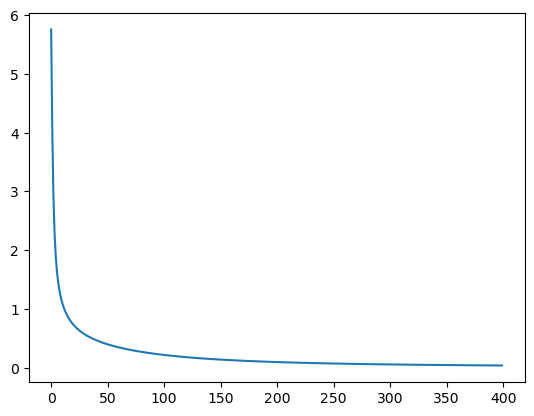

In [910]:
t=np.arange(0,iterations)
plt.plot(t,cost_list)
plt.show()

In [911]:
W_M1=Params['w1']
W_M2=Params['w2']
b1=Params['b1']
b2=Params['b2']



In [912]:

f_c=forward_prop(X_test,n_h,W_M1,W_M2,b1,b2)
a_out=f_c['A2']


In [913]:
a_out=np.argmax(a_out,0)

y_out=np.argmax(y_test,0)

In [914]:
# labelled test data
y_out

array([6, 6, 5, 1, 1, 6, 4, 6, 1, 9, 4, 7, 7, 4, 1, 9, 4, 2, 2, 4, 3, 4,
       5, 1, 9, 3, 3, 3, 0, 3, 9, 1, 4, 2, 3, 0, 0, 9, 3, 5, 4, 0, 8, 9,
       3, 7, 8, 1, 3, 0, 0, 5, 3, 2, 1, 8, 0, 9, 8, 7, 4, 0, 4, 5, 0, 0,
       2, 7, 6, 7, 6, 1, 2, 3, 1, 3, 2, 4, 5, 8, 4, 6, 6, 9, 8, 8, 0, 2,
       7, 7, 3, 4, 5, 6, 8, 1, 6, 6, 1, 0, 8, 9, 8, 1, 7, 2, 5, 6, 6, 8,
       7, 6, 7, 1, 3, 3, 5, 4, 9, 3, 6, 9, 9, 7, 1, 3, 5, 5, 1, 0, 2, 2,
       4, 0, 9, 7, 7, 4, 8, 2, 0, 0, 4, 9, 1, 1, 4, 6, 1, 1, 4, 9, 1, 1,
       4, 0, 1, 5, 2, 7, 6, 2, 0, 2, 5, 9, 1, 7, 9, 8, 0, 3, 0, 8, 7, 1,
       8, 8, 1, 7, 5, 9, 1, 6, 1, 2, 0, 1, 3, 5, 9, 2, 8, 7, 9, 2, 8, 6,
       5, 6, 5, 4, 1, 4, 9, 8, 1, 6, 7, 4, 6, 1, 5, 1, 7, 9, 6, 4, 8, 7,
       1, 6, 1, 8, 7, 2, 4, 3, 8, 0, 5, 1, 7, 3, 4, 1, 2, 9, 4, 3, 2, 8,
       8, 0, 7, 1, 1, 3, 6, 3, 1, 2, 5, 4, 2, 2, 0, 8, 8, 8, 5, 5, 1, 0,
       6, 4, 3, 1, 3, 3, 4, 7, 5, 1, 9, 7, 8, 1, 7, 9, 3, 0, 9, 2, 3, 0,
       3, 0, 9, 7, 5, 4, 6, 7, 5, 1, 0, 8, 0, 4, 3,

In [915]:
#predicted from testdata
a_out

array([6, 6, 5, 1, 1, 6, 4, 6, 1, 9, 4, 7, 1, 4, 1, 9, 4, 2, 5, 7, 3, 4,
       5, 1, 9, 3, 3, 3, 0, 2, 9, 1, 8, 2, 3, 0, 0, 9, 3, 5, 4, 7, 8, 9,
       3, 7, 2, 1, 3, 0, 0, 5, 3, 2, 1, 5, 0, 9, 8, 7, 4, 0, 9, 5, 0, 0,
       2, 7, 6, 7, 6, 1, 2, 3, 1, 3, 2, 4, 3, 8, 4, 6, 6, 9, 8, 8, 0, 2,
       7, 7, 3, 4, 5, 6, 8, 1, 6, 6, 1, 0, 8, 9, 1, 1, 7, 2, 5, 6, 6, 8,
       7, 6, 7, 1, 3, 1, 5, 4, 9, 3, 6, 9, 9, 7, 1, 3, 5, 4, 1, 0, 2, 2,
       2, 5, 9, 7, 7, 4, 8, 8, 0, 0, 4, 4, 1, 1, 4, 6, 1, 1, 3, 7, 1, 1,
       4, 0, 1, 5, 2, 7, 6, 2, 8, 2, 5, 3, 1, 7, 9, 8, 0, 5, 0, 8, 7, 1,
       8, 8, 1, 7, 5, 9, 1, 6, 1, 0, 0, 1, 3, 5, 9, 2, 8, 7, 9, 2, 3, 6,
       5, 8, 3, 4, 1, 4, 9, 8, 1, 6, 7, 4, 6, 1, 5, 1, 7, 8, 6, 4, 9, 4,
       1, 6, 1, 8, 9, 2, 4, 3, 8, 0, 5, 1, 7, 3, 4, 1, 2, 9, 9, 3, 2, 8,
       1, 0, 7, 1, 1, 3, 6, 3, 1, 2, 5, 4, 2, 2, 0, 8, 8, 8, 5, 5, 1, 0,
       6, 4, 3, 1, 3, 3, 4, 7, 5, 1, 9, 7, 3, 1, 7, 9, 3, 0, 9, 2, 3, 0,
       3, 0, 9, 7, 5, 4, 6, 4, 5, 1, 0, 0, 0, 4, 3,

In [916]:
lis=[a_out==y_out]

In [917]:
#calculation of accuracy

count=0
for char in lis:
    for i in char:
        if i==True:
            count+=1
print("accuracy :",count/X_test.shape[1]*100,"%")

accuracy : 87.16666666666667 %


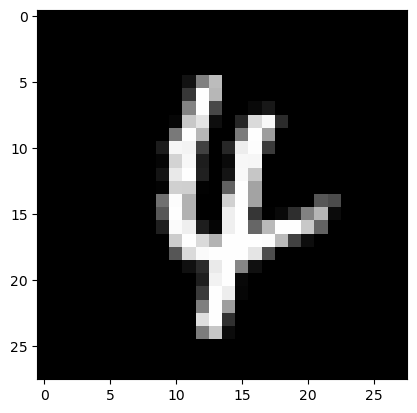

prediction : [4]


In [921]:
#printing the image and showing its prediction
import random

idx=random.randint(0,X_test.shape[1])
plt.imshow(X_test[:,idx].reshape(28,28),cmap='gray')
plt.show()

instance=X_test[:,idx].reshape(28*28,1)
f_c=forward_prop(instance,n_h,W_M1,W_M2,b1,b2)
a_out=f_c['A2']

num=np.argmax(a_out,0)

print("prediction :", num)